In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.spatial.distance as dt
import scipy.stats as stats

group_means = np.array([[-6.0, -1.0],
                        [-3.0, +2.0],
                        [+3.0, +2.0],
                        [+6.0, -1.0]])

group_covariances = np.array([[[+0.4, +0.0],
                               [+0.0, +4.0]],
                              [[+2.4, -2.0],
                               [-2.0, +2.4]],
                              [[+2.4, +2.0],
                               [+2.0, +2.4]],
                              [[+0.4, +0.0],
                               [+0.0, +4.0]]])

# read data into memory
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",")

# get X values
X = data_set[:, [0, 1]]

# set number of clusters
K = 4



In [8]:
# STEP 2
# should return initial parameter estimates
# as described in the homework description
def initialize_parameters(X, K):
    # your implementation starts below
    initial_means = np.genfromtxt("hw05_initial_centroids.csv", delimiter=",")
    assert initial_means.shape == (K, X.shape[1])

    # Select the first K rows as initial means
    means = initial_means[:K]

    # Assign points by distance to initial means
    distances = dt.cdist(X, means)
    assignments = np.argmin(distances, axis=1)

    # Calculate covariances for each cluster
    covariances = np.array([np.cov(X[assignments == k].T) for k in range(K)])

    # Calculate priors for each cluster
    priors = np.array([np.mean(assignments == k) for k in range(K)])
    # your implementation ends above
    return(means, covariances, priors)

means, covariances, priors = initialize_parameters(X, K)



In [9]:
# STEP 3
# should return final parameter estimates of
# EM clustering algorithm
def em_clustering_algorithm(X, K, means, covariances, priors):
    # your implementation starts below
    iterations = 100

    assert not (len(means) > K)
    if len(means) < K:
        print("Warning: Number of means is not equal to K. Using means up to K.")
        means = means[:K]

    for _ in range(iterations):
        responsibilities = np.zeros((X.shape[0], K))
        for k in range(K):
            rv = stats.multivariate_normal(means[k], covariances[k])
            responsibilities[:, k] = rv.pdf(X) * priors[k]
        
        responsibilities /= np.sum(responsibilities, axis=1)[:, np.newaxis]

        new_means = np.zeros((K, X.shape[1]))
        for k in range(K):
            weighted_sum = np.sum(responsibilities[:, k][:, np.newaxis] * X, axis=0)
            new_means[k] = weighted_sum / np.sum(responsibilities[:, k])

        n_features = X.shape[1]
        new_covariances = np.zeros((K, n_features, n_features))
        for k in range(K):
            deviation = X - new_means[k]
            weighted_outer_product = np.sum(responsibilities[:, k][:, np.newaxis, np.newaxis] * 
                                             np.einsum('ij,ik->ijk', deviation, deviation), axis=0)
            new_covariances[k] = weighted_outer_product / np.sum(responsibilities[:, k])

        priors = np.sum(responsibilities, axis=0) / X.shape[0]

    assignments = np.argmax(responsibilities, axis=1)

    return new_means, new_covariances, priors, assignments

means, covariances, priors, assignments = em_clustering_algorithm(X, K, means, covariances, priors)
print(means)
print(priors)


[[-4.45904403  0.50058151]
 [-0.0239905  -1.72024402]
 [ 4.55346316  0.45780955]
 [ 1.96610817  4.25045622]]
[5.11777653e-01 8.22089063e-44 4.88149055e-01 7.32923180e-05]


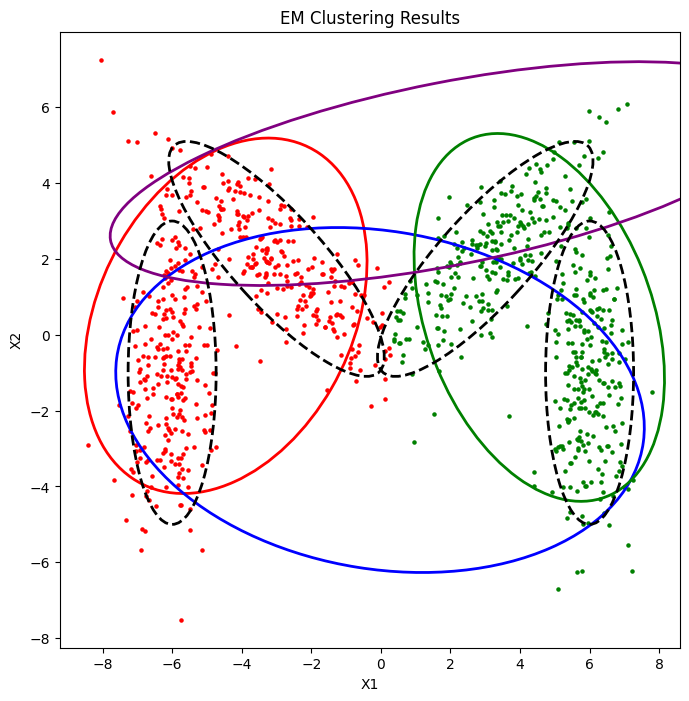

In [14]:
def draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments):
    # your implementation starts below
    from matplotlib.patches import Ellipse
    scale_factor = 4
    plt.figure(figsize=(8, 8))
    colors = ['red', 'blue', 'green', 'purple']
    for k in range(K):
        plt.scatter(X[assignments == k, 0], X[assignments == k, 1], c=colors[k], s=5)
    # for mean, color in zip(means, colors):
    #     plt.scatter(mean[0], mean[1], c=color, s=100, edgecolors='k')

    for mean, cov, color in zip(means, covariances, colors):
        eigenvalues, eigenvectors = linalg.eig(cov)
        angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
        width, height = scale_factor * np.sqrt(eigenvalues) 
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle, 
                      edgecolor=color, lw=2, facecolor='none')
        plt.gca().add_artist(ell)

    # Plot the true means and covariances
    for mean, cov in zip(group_means, group_covariances):
        eigenvalues, eigenvectors = linalg.eig(cov)
        angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
        width, height = scale_factor * np.sqrt(eigenvalues) 
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle, 
                      edgecolor="black", lw=2, facecolor='none', linestyle='dashed')
        plt.gca().add_artist(ell)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('EM Clustering Results')
    plt.savefig('0078940.png')
    plt.show()
draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments)

[[-6.04008414 -0.99017705]
 [-2.84646474  1.92541135]
 [ 5.93045701 -1.1106533 ]
 [ 3.14181338  2.14469912]]
[0.25421917 0.26069595 0.24900801 0.23607687]


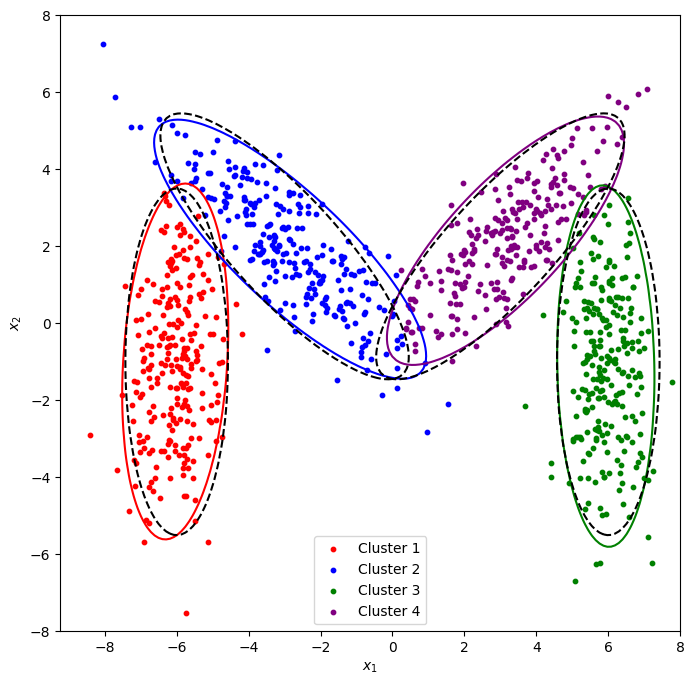

<Figure size 640x480 with 0 Axes>

In [32]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.spatial.distance as dt
import scipy.stats as stats

group_means = np.array([[-6.0, -1.0],
                        [-3.0, +2.0],
                        [+3.0, +2.0],
                        [+6.0, -1.0]])

group_covariances = np.array([[[+0.4, +0.0],
                               [+0.0, +4.0]],
                              [[+2.4, -2.0],
                               [-2.0, +2.4]],
                              [[+2.4, +2.0],
                               [+2.0, +2.4]],
                              [[+0.4, +0.0],
                               [+0.0, +4.0]]])

# read data into memory
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",")

# get X values
X = data_set[:, [0, 1]]

# set number of clusters
K = 4

# STEP 2
# should return initial parameter estimates
# as described in the homework description
def initialize_parameters(X, K):
    # your implementation starts below
    initial_means = np.genfromtxt("hw05_initial_centroids.csv", delimiter=",")
    assert initial_means.shape == (K, X.shape[1])

    # Select the first K rows as initial means
    means = initial_means[:K]

    # Assign points by distance to initial means
    distances = dt.cdist(X, means)
    assignments = np.argmin(distances, axis=1)

    # Calculate covariances for each cluster
    covariances = np.array([np.cov(X[assignments == k].T) for k in range(K)])

    # Calculate priors for each cluster
    priors = np.array([np.mean(assignments == k) for k in range(K)])
    # your implementation ends above
    return(means, covariances, priors)

means, covariances, priors = initialize_parameters(X, K)

# STEP 3
# should return final parameter estimates of
# EM clustering algorithm
def em_clustering_algorithm(data_points, num_clusters, cluster_means, cluster_covariances, cluster_priors):

    # Initialize cluster assignments
    data_point_assignments = np.zeros(data_points.shape[0])
    iteration=100
    for _ in range(iteration):

        cluster_responsibilities = np.array([
            cluster_priors[cluster_index] * stats.multivariate_normal(
                cluster_means[cluster_index], cluster_covariances[cluster_index]
            ).pdf(data_points)
            for cluster_index in range(num_clusters)
        ]).T 

        sum_responsibilities = np.sum(cluster_responsibilities, axis=1).reshape(-1, 1)
        cluster_responsibilities /= sum_responsibilities

        for cluster_index in range(num_clusters):
            responsibility_for_cluster = cluster_responsibilities[:, cluster_index].reshape(-1, 1)
            total_responsibility = np.sum(responsibility_for_cluster)

            cluster_means[cluster_index] = np.sum(responsibility_for_cluster * data_points, axis=0) / total_responsibility
            deviation_from_mean = data_points - cluster_means[cluster_index]
            cluster_covariances[cluster_index] = (deviation_from_mean.T @ (responsibility_for_cluster * deviation_from_mean)) / total_responsibility
            cluster_priors[cluster_index] = total_responsibility / data_points.shape[0]

        data_point_assignments = np.argmax(cluster_responsibilities, axis=1)

    return cluster_means, cluster_covariances, cluster_priors, data_point_assignments


means, covariances, priors, assignments = em_clustering_algorithm(X, K, means, covariances, priors)
print(means)
print(priors)

# STEP 4
# should draw EM clustering results as described
# in the homework description
def draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments):
    plt.figure(figsize=(8, 8))
    colors = ['red', 'blue', 'green', 'purple']

    [plt.scatter(X[assignments == i, 0], X[assignments == i, 1], s=10, color=colors[i], label=f'Cluster {i+1}') for i in range(K)]


    x = np.linspace(-8, 8, 151)
    y = np.linspace(-8, 8, 151)

    X_mesh, Y_mesh = np.meshgrid(x, y)
    pos = np.empty(X_mesh.shape + (2,))
    pos[:, :, 0] = X_mesh; pos[:, :, 1] = Y_mesh

    [plt.contour(X_mesh, Y_mesh, stats.multivariate_normal.pdf(pos, mean=means[i], cov=covariances[i]), levels=[0.01], colors=colors[i]) for i in range(K)]
    [plt.contour(X_mesh, Y_mesh, stats.multivariate_normal.pdf(pos, mean=group_means[i], cov=group_covariances[i]), levels=[0.01], colors='k', linestyles='dashed') for i in range(K)]

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.show()
    plt.savefig("0072843.pdf")

# Example usage:
draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments)